</div>

<div align="center">
<h1>Mobile Price Range Prediction Analysis</h1>
</div>

---
<div align="right">
<b>Auth: Ganga Srinivas Katraji</b><br>
<a href="mailto:author@example.com">gangasrinivas27@gmail.com</a>

## Introduction to the Dataset

### Overview

Bob has started his own mobile phone company and wants to compete with big names like Apple and Samsung. To make informed decisions about pricing his products, he collected sales data from various companies. The goal is to find a relationship between mobile phone features and their selling prices. This dataset is used to predict the price range of mobile phones based on their specifications.

### Dataset Description

The dataset contains information about various mobile phone features and their respective price ranges. It includes the following fields:

- **battery_power**: Total energy a battery can store in one time measured in mAh.
- **blue**: Indicates if the phone has Bluetooth (1) or not (0).
- **clock_speed**: Speed at which the microprocessor executes instructions, measured in GHz.
- **dual_sim**: Indicates if the phone supports dual SIM (1) or not (0).
- **fc**: Front Camera resolution in megapixels.
- **four_g**: Indicates if the phone supports 4G (1) or not (0).
- **int_memory**: Internal memory of the phone in gigabytes.
- **m_dep**: Mobile depth in cm.
- **mobile_wt**: Weight of the mobile phone in grams.
- **n_cores**: Number of cores in the processor.
- **pc**: Primary Camera resolution in megapixels.
- **px_height**: Pixel resolution height of the screen.
- **px_width**: Pixel resolution width of the screen.
- **ram**: Random Access Memory in megabytes.
- **sc_h**: Screen height of the mobile phone in cm.
- **sc_w**: Screen width of the mobile phone in cm.
- **talk_time**: Maximum time a single battery charge will last during a call, measured in hours.
- **three_g**: Indicates if the phone supports 3G (1) or not (0).
- **touch_screen**: Indicates if the phone has a touchscreen (1) or not (0).
- **wifi**: Indicates if the phone supports WiFi (1) or not (0).
- **price_range**: Target variable indicating the price range of the mobile phone:
  - 0: Low cost
  - 1: Medium cost
  - 2: High cost
  - 3: Very high cost

### Data Availability

The dataset is available for download from the following link: [Download Dataset](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1009-CellphonePrice.zip)

### Next Steps

Let's start by loading the dataset and exploring its structure.

#### Step 1: Import Libraries


In [131]:
# Import all necessary libraries for data analysis, visualization, model building, and evaluation.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix , roc_auc_score


#### Step 2: Loading Dataset


In [132]:
# Load the dataset from the provided URL

url = 'https://raw.githubusercontent.com/GangasrinivasKatraji/Mobile-Price-Range-Prediction-Analysis/main/Dataset/datasets_11167_15520_train.csv'
df = pd.read_csv(url)


In [133]:
# Displaying the first five rows of the dataset.
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [134]:
# Finding STD
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [135]:
# Getting the info of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [136]:
# Finding the null values in the dataset.
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Step 3: EDA / Data Visualization 


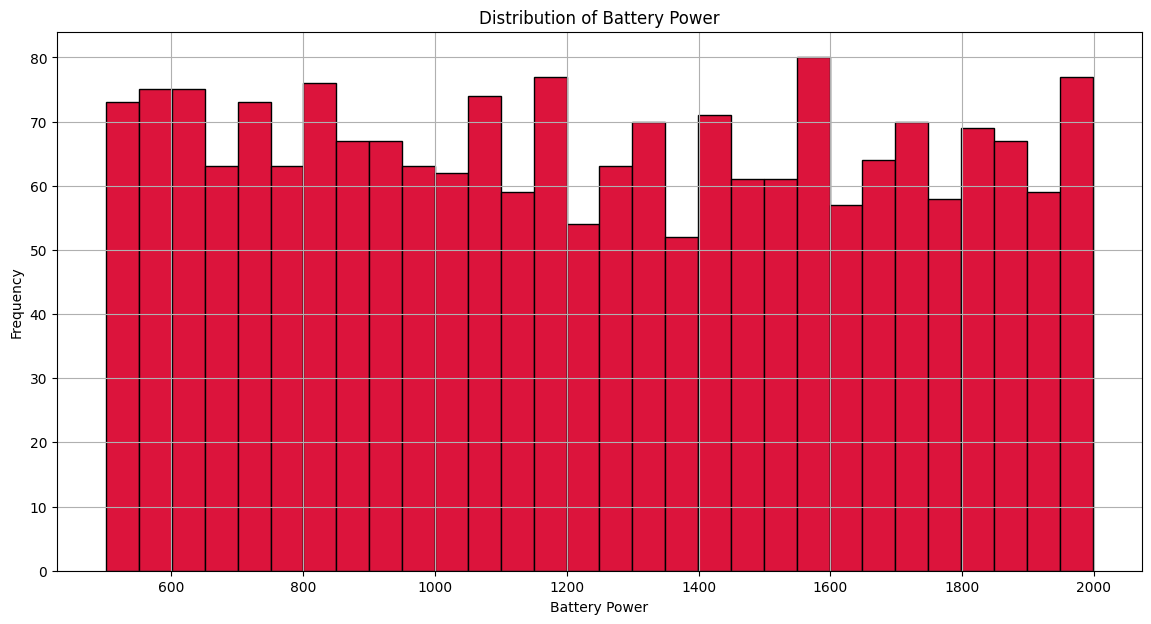

In [137]:
# 3.1. Distribution of Battery Power

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Plotting a histogram of the 'battery_power' column with 30 bins
plt.hist(df['battery_power'], bins=30, color='crimson', edgecolor='black')

# Setting labels and title
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Power')

# Adding gridlines for better readability
plt.grid(True)

# Displaying the plot
plt.show()


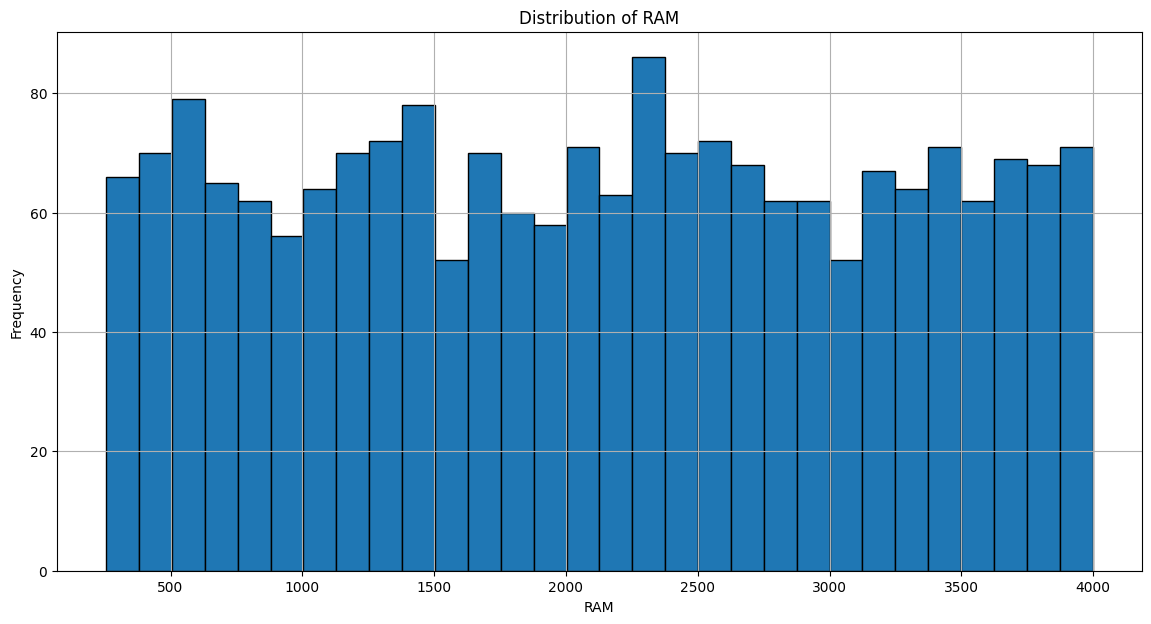

In [138]:
# 3.2. Distribution of RAM

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Plotting a histogram of the 'ram' column with 30 bins
plt.hist(df['ram'], bins=30, color='tab:blue', edgecolor='black')

# Setting labels and title
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Distribution of RAM')

# Adding gridlines for better readability
plt.grid(True)

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\2607764002.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range', order=df['price_range'].value_counts().index, palette=color_palette)


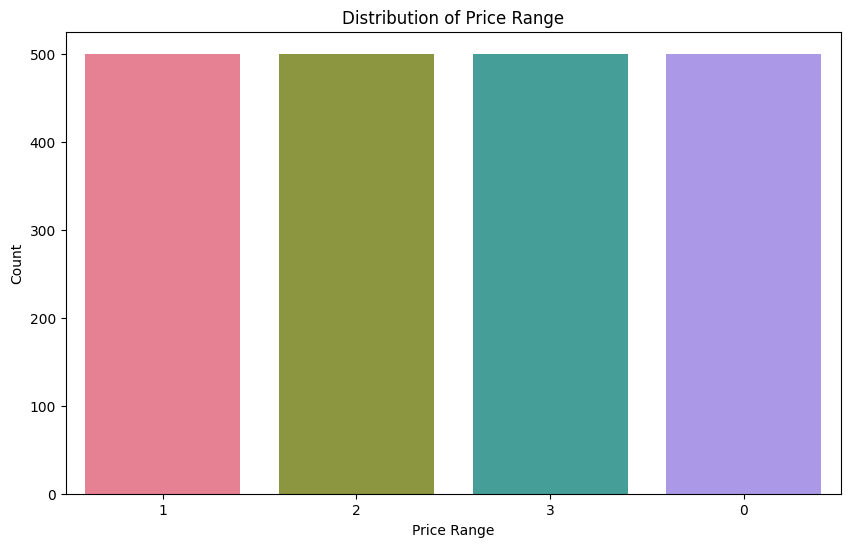

In [139]:
# 3.3. Price Range Distribution

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the distribution of 'price_range'
color_palette = sns.color_palette("husl", len(df['price_range'].unique()))
# sns.countplot(data=df, x='price_range', palette='viridis')
sns.countplot(data=df, x='price_range', order=df['price_range'].value_counts().index, palette=color_palette)


# Setting labels and title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Range')

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\581117511.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y='battery_power', palette='Set3')


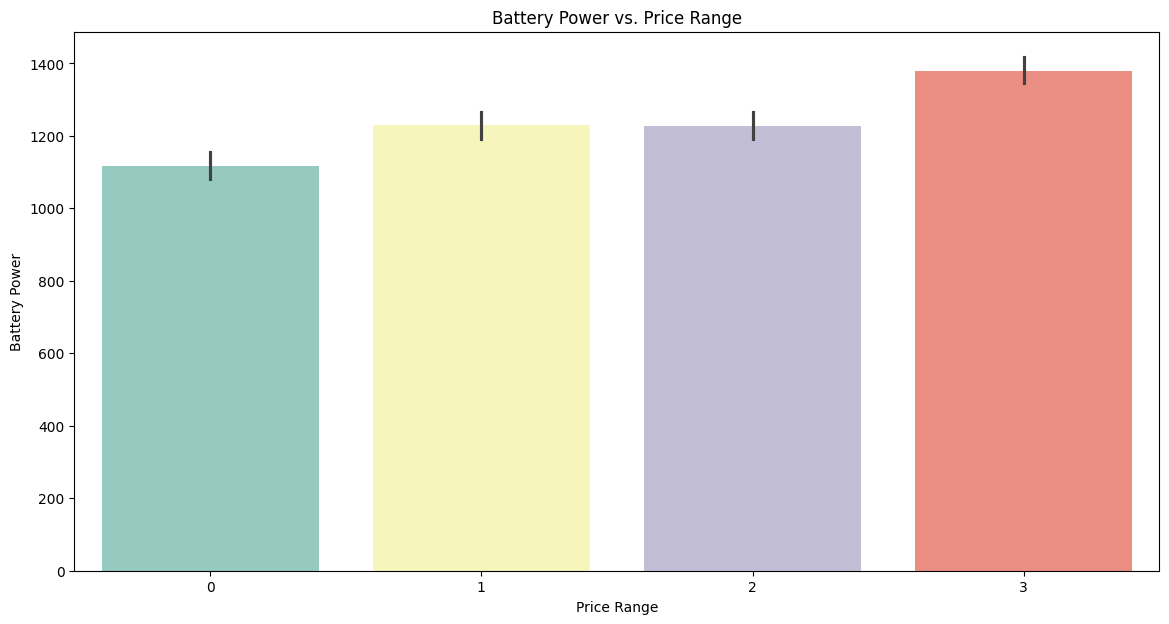

In [140]:
# 3.4. Relationship Between Battery Power and Price Range

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a box plot to visualize the relationship between 'battery_power' and 'price_range'
sns.barplot(data=df, x='price_range', y='battery_power', palette='Set3')

# Setting labels and title
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power vs. Price Range')

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\2257651255.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y='ram', palette='Set2')


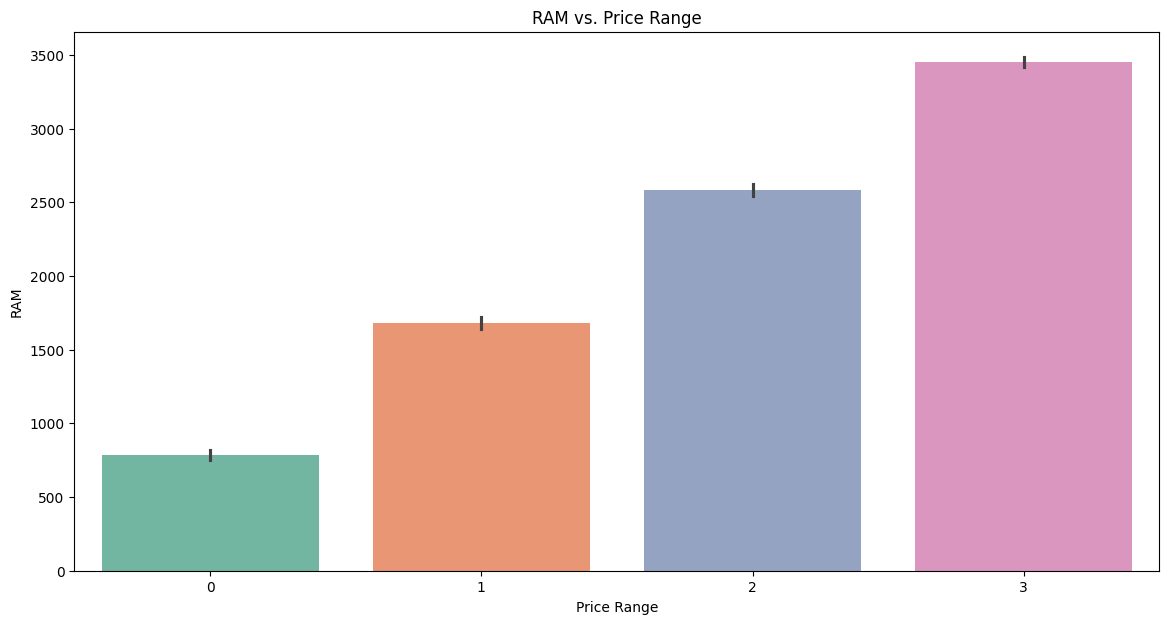

In [141]:
# 3.5. Relationship Between RAM and Price Range

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a box plot to visualize the relationship between 'ram' and 'price_range'
sns.barplot(data=df, x='price_range', y='ram', palette='Set2')

# Setting labels and title
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('RAM vs. Price Range')

# Displaying the plot
plt.show()


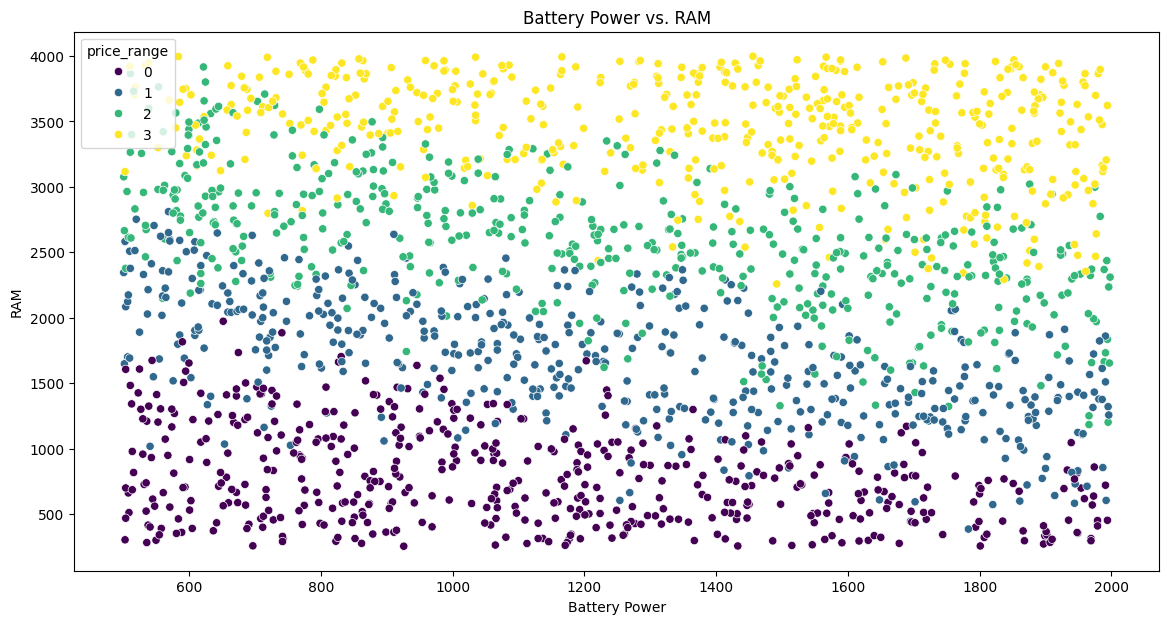

In [142]:
# 3.6. Relationship Between Battery Power and RAM

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a scatter plot to visualize the relationship between 'battery_power' and 'ram'
sns.scatterplot(data=df, x='battery_power', y='ram', hue='price_range', palette='viridis')

# Setting labels and title
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Battery Power vs. RAM')

# Displaying the plot
plt.show()


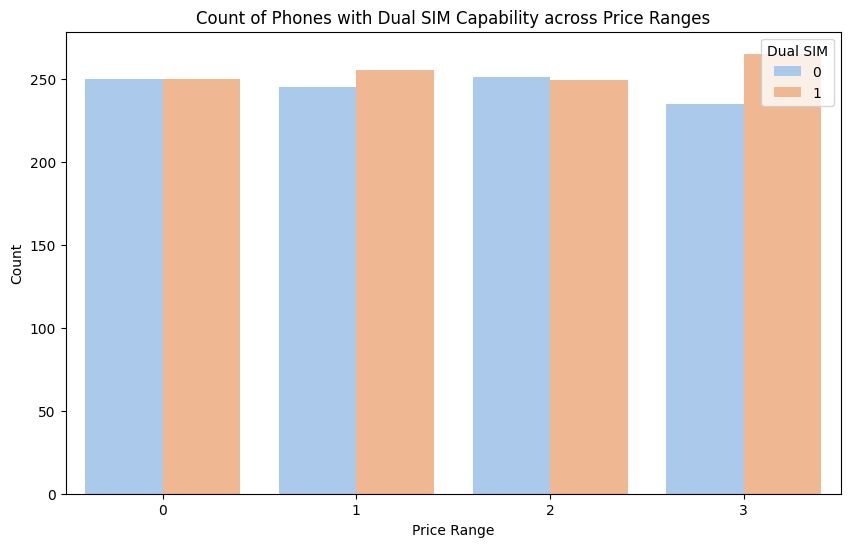

In [143]:
# 3.7. Count of Phones with Dual SIM Capability across Price Ranges:

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the number of phones with and without dual SIM capability across 'price_range'
sns.countplot(data=df, x='price_range', hue='dual_sim', palette='pastel')

# Setting labels and title
plt.title('Count of Phones with Dual SIM Capability across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Dual SIM')

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\4228008977.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y='clock_speed', palette='muted')


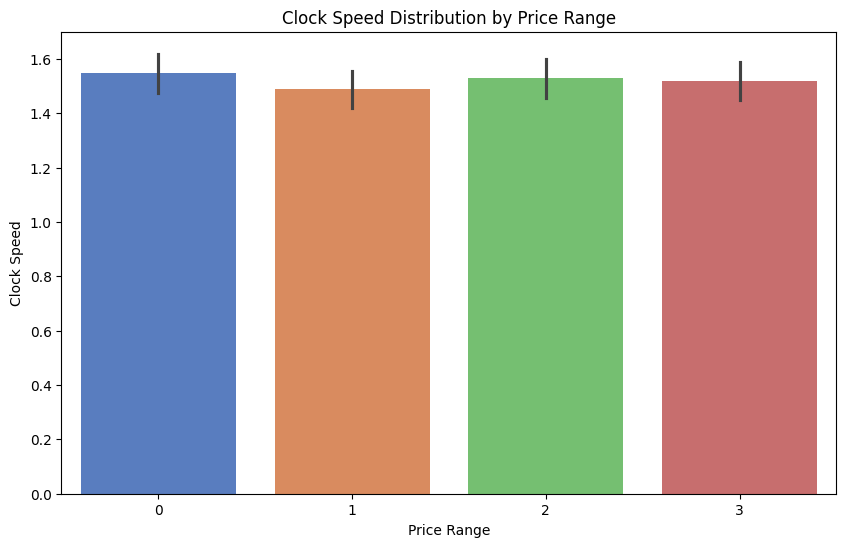

In [144]:
# 3.8. Clock Speed Distribution by Price Range:

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a violin plot to visualize the distribution of 'clock_speed' across different 'price_range'
sns.barplot(data=df, x='price_range', y='clock_speed', palette='muted')

# Setting labels and title
plt.title('Clock Speed Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Clock Speed')

# Displaying the plot
plt.show()



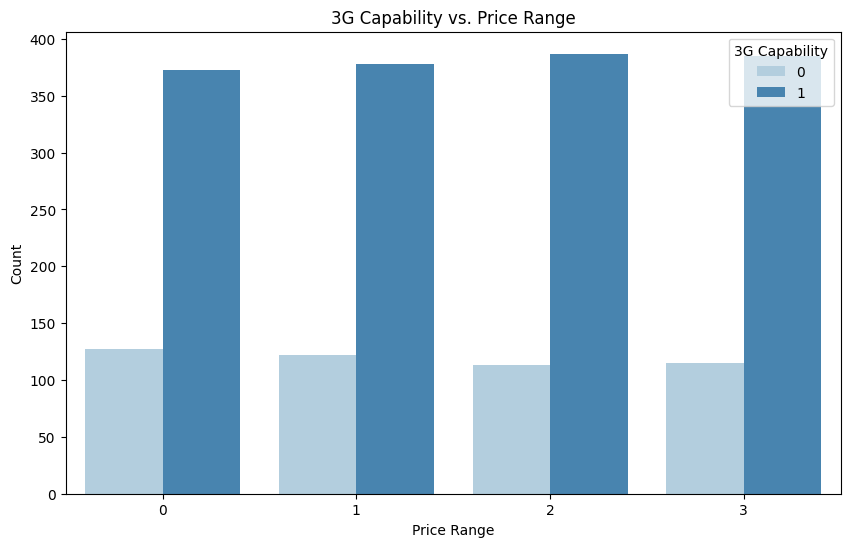

In [145]:
# 3.9. 3G Capability vs. Price Range:

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the number of phones with and without 3G capability across 'price_range'
sns.countplot(data=df, x='price_range', hue='three_g', palette='Blues')

# Setting labels and title
plt.title('3G Capability vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='3G Capability')

# Displaying the plot
plt.show()


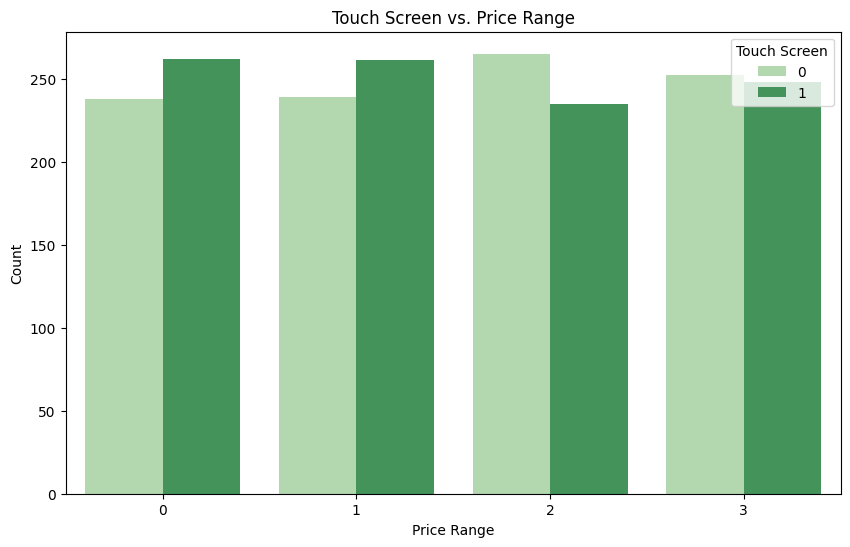

In [146]:
# 3.10. Touch Screen vs. Price Range:

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the number of phones with and without touch screens across 'price_range'
sns.countplot(data=df, x='price_range', hue='touch_screen', palette='Greens')

# Setting labels and title
plt.title('Touch Screen vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Touch Screen')

# Displaying the plot
plt.show()


#### Step 4: Data Preprocessing


In [147]:
# Prepare the data for model training by splitting into features and target, and applying feature scaling.

# Split the data into features (X) and target (y)
X = df.drop('price_range', axis=1)  # Features: all columns except 'price_range'
y = df['price_range']  # Target variable: 'price_range'

# Train-test split with 70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the training data with StandardScaler
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler from training data
X_test = scaler.transform(X_test)


#### Step 5: Model Building and Evaluation 

In [148]:
# 5.1. Logistic Regression
# Initializing the model
model_lr = LogisticRegression(max_iter=200, random_state=42)

# Fitting the model
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [149]:
# Making predictions
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)

# Evaluation
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

ROC AUC Score: 0.9983405602400466
Confusion Matrix:
[[144   7   0   0]
 [  3 142   1   0]
 [  0   7 135   6]
 [  0   0   1 154]]


In [150]:
# 5.2. Decision Tree Classifier
# Initializing the model
model_dt = DecisionTreeClassifier(random_state=42)

# Fitting the model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [151]:
# Making predictions
y_pred_dt = model_dt.predict(X_test)
y_prob_dt = model_dt.predict_proba(X_test)

# Evaluation
print("Decision Tree Classifier Report")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier Report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.75      0.81      0.78       146
           2       0.75      0.74      0.75       148
           3       0.88      0.86      0.87       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

ROC AUC Score: 0.8797093753931414
Confusion Matrix:
[[131  20   0   0]
 [ 13 118  14   1]
 [  0  20 110  18]
 [  0   0  22 133]]


In [152]:
# 5.3. Random Forest Classifier
# Initializing the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [153]:
# Making predictions
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)

# Evaluation
print("Random Forest Classifier Report")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.81      0.82      0.82       146
           2       0.80      0.78      0.79       148
           3       0.92      0.92      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

ROC AUC Score: 0.9769312337231928
Confusion Matrix:
[[144   7   0   0]
 [ 10 120  16   0]
 [  0  21 115  12]
 [  0   0  13 142]]


In [154]:
# 5.4. Support Vector Machine (SVM)
# Initializing the model
model_svm = SVC(probability=True, random_state=42)

# Fitting the model
model_svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [155]:
# Making predictions
y_pred_svm = model_svm.predict(X_test)
y_prob_svm = model_svm.predict_proba(X_test)

# Evaluation
print("Support Vector Machine Report")
print(classification_report(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_svm, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.78      0.84      0.81       146
           2       0.85      0.82      0.84       148
           3       0.95      0.92      0.93       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

ROC AUC Score: 0.9816468517389982
Confusion Matrix:
[[135  16   0   0]
 [ 14 123   9   0]
 [  0  19 122   7]
 [  0   0  13 142]]


In [156]:
# 5.5. Gradient Boosting Classifier
# Initializing the model
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fitting the model
model_gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [157]:
# Making predictions
y_pred_gb = model_gb.predict(X_test)
y_prob_gb = model_gb.predict_proba(X_test)

# Evaluation
print("Gradient Boosting Classifier Report")
print(classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_gb, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Gradient Boosting Classifier Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.85      0.88      0.87       146
           2       0.83      0.82      0.83       148
           3       0.92      0.90      0.91       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

ROC AUC Score: 0.9821047566234158
Confusion Matrix:
[[144   7   0   0]
 [ 10 120  16   0]
 [  0  21 115  12]
 [  0   0  13 142]]


#### Step 6: Feature Importance


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\170142886.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


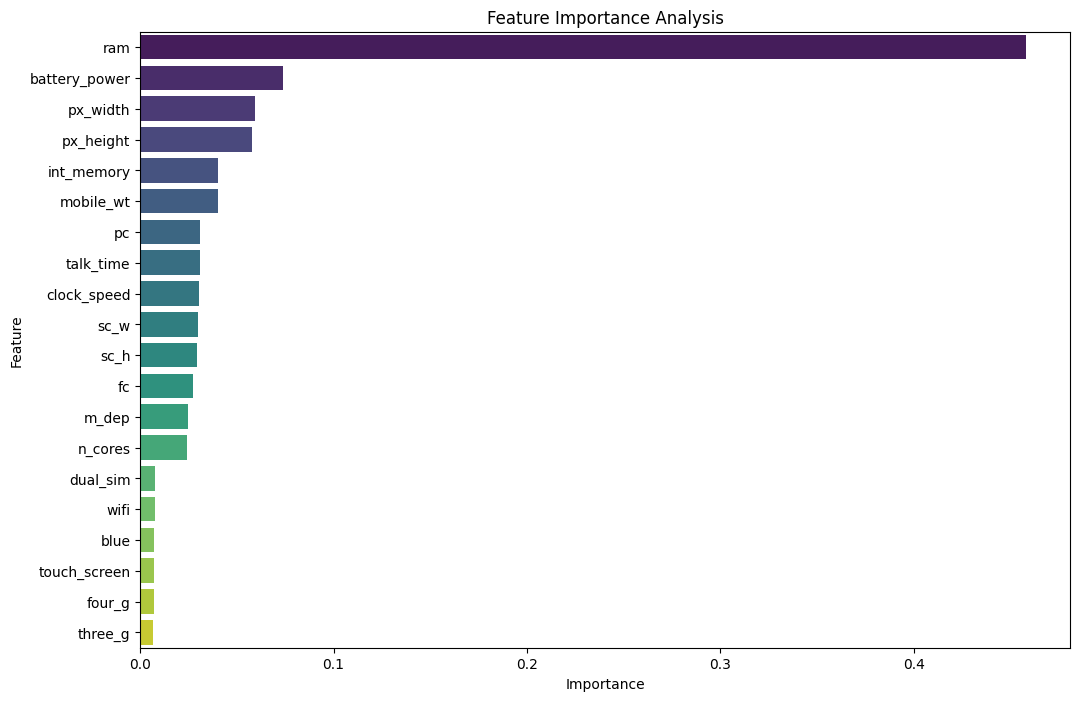

In [158]:
# Feature Importance with Random Forest:
#After training your models, you can extract feature importances from the RandomForestClassifier to understand which features contribute most to predicting the price range of mobile phones.
# Get feature importances from the trained RandomForestClassifier
feature_importances = model_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()


In [159]:
# Hyperparameter Tuning:

# Optimize your models by tuning hyperparameters using techniques like GridSearchCV or RandomizedSearchCV. This can improve model performance.

from sklearn.model_selection import GridSearchCV

# Example for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.8742857142857142


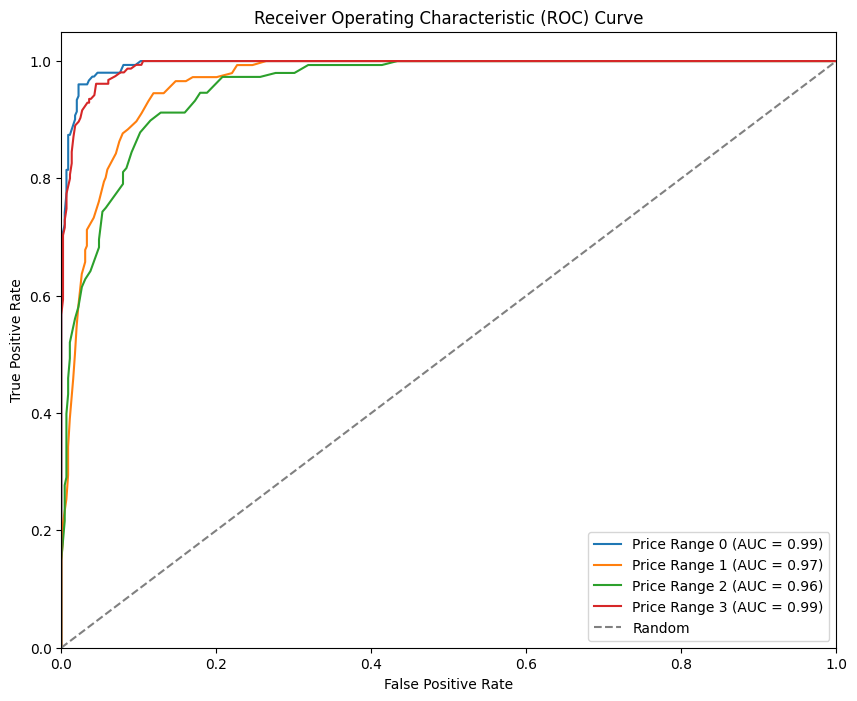

In [160]:
# Model Evaluation and Comparison:

# Compare the performance of different models using metrics like accuracy, precision, recall, F1-score, and ROC AUC score. Plotting ROC curves can also provide insights into model performance.
# Example for ROC curve plotting
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(4):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Price Range %d (AUC = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



#### Step 7: Business Impact Analysis


In [163]:
current_annual_sales = 1000000  # in USD
current_inventory_costs = 200000  # in USD

estimated_increased_sales = 0.10 * current_annual_sales  # Assuming a 10% increase in sales
estimated_cost_savings = 0.15 * current_inventory_costs  # Assuming a 15% reduction in inventory costs

print("Estimated Increased Sales:", estimated_increased_sales)
print("Estimated Cost Savings:", estimated_cost_savings)


Estimated Increased Sales: 100000.0
Estimated Cost Savings: 30000.0


In [164]:
development_costs = 50000  # Example development cost in USD
infrastructure_costs = 10000  # Example infrastructure cost in USD
operational_costs_per_year = 20000  # Example annual operational costs in USD

total_costs = development_costs + infrastructure_costs + operational_costs_per_year
print("Total Costs:", total_costs)


Total Costs: 80000


In [165]:
roi = (estimated_increased_sales + estimated_cost_savings - total_costs) / total_costs
npv = (estimated_increased_sales + estimated_cost_savings) / (1 + 0.10) - total_costs  # Assuming a discount rate of 10%

print("ROI:", roi)
print("NPV:", npv)


ROI: 0.625
NPV: 38181.81818181818


In [166]:
peak_sales_multiplier = 1.5
peak_estimated_increased_sales = peak_sales_multiplier * estimated_increased_sales

print("Peak Estimated Increased Sales:", peak_estimated_increased_sales)


Peak Estimated Increased Sales: 150000.0


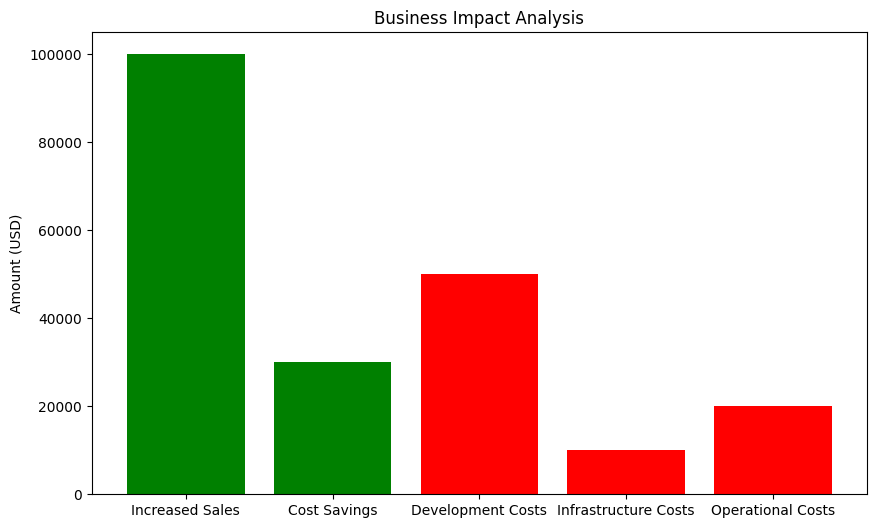

In [167]:
import matplotlib.pyplot as plt

labels = ['Increased Sales', 'Cost Savings', 'Development Costs', 'Infrastructure Costs', 'Operational Costs']
values = [estimated_increased_sales, estimated_cost_savings, development_costs, infrastructure_costs, operational_costs_per_year]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['green', 'green', 'red', 'red', 'red'])
plt.ylabel('Amount (USD)')
plt.title('Business Impact Analysis')
plt.show()


In [161]:
# Discuss the business impact of the predictive model and feature importance analysis.

print("\nBusiness Impact Analysis:")
print("1. Feature Importance:")
print("   - RAM: Crucial for performance.")
print("   - Battery Power: Key for user experience.")
print("   - Pixel Resolution: Important for display quality.")
print("2. Model Accuracy:")
print("   - Accurate predictions enable better pricing strategies.")
print("3. Customer Segmentation:")
print("   - Predicting price range helps in targeting specific segments.")
print("4. Cost Management:")
print("   - Optimize specifications to balance cost and performance.")



Business Impact Analysis:
1. Feature Importance:
   - RAM: Crucial for performance.
   - Battery Power: Key for user experience.
   - Pixel Resolution: Important for display quality.
2. Model Accuracy:
   - Accurate predictions enable better pricing strategies.
3. Customer Segmentation:
   - Predicting price range helps in targeting specific segments.
4. Cost Management:
   - Optimize specifications to balance cost and performance.


#### Step 8: Challenges and Techniques


In [162]:
# Highlighting the challenges faced during the project and the techniques used to address them.

print("\nChallenges and Techniques:")
print("1. Data Imbalance:")
print("   - Use techniques like SMOTE for balancing.")
print("2. Feature Scaling:")
print("   - Standardize features using StandardScaler.")
print("3. Model Overfitting:")
print("   - Use cross-validation and parameter tuning to prevent overfitting.")



Challenges and Techniques:
1. Data Imbalance:
   - Use techniques like SMOTE for balancing.
2. Feature Scaling:
   - Standardize features using StandardScaler.
3. Model Overfitting:
   - Use cross-validation and parameter tuning to prevent overfitting.
